### Створимо набір даних

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
df = pd.DataFrame(X, columns=["Feature1"])
df["Target"] = y
df = df.round(2)
df.to_csv("regression_data.csv", index=False)

### Створимо набір данних опціонально

In [3]:
import numpy as np
n = 200
np.random.seed(42)

area = np.random.normal(60, 15, n)


price = 1200 * area + np.random.normal(0, 10000, n)

df = pd.DataFrame({
   'area': area,
   'price': price
})
df = df.round(2)
df.to_csv('synthetic_regression_dataset.csv', index=False)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

### Варіант 1 — Готовий набір із Kaggle

MSE: 7.752986666319193, MAE: 2.2020818674091127, R2: 0.9910998765243975


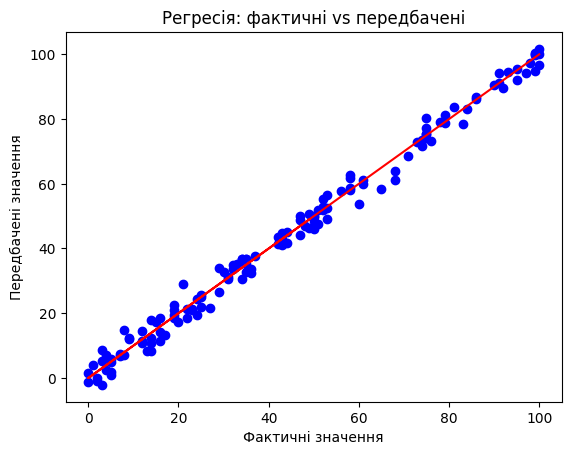

In [ ]:
df_kaggle = pd.read_csv("train.csv")
df_kaggle = df_kaggle.dropna(subset=["x", "y"])
# Приклад: визначимо X і y
X = df_kaggle[["x"]]
y = df_kaggle["y"]
#Створення і навчання моделі
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
# Передбачення
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

# Візуалізація
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Фактичні значення")
plt.ylabel("Передбачені значення")
plt.title("Регресія: фактичні vs передбачені")
plt.show()

### Варіант 2 — Згенерований набір через make_regression()

MSE: 103.09219682042911, MAE: 8.363746789347076, R2: 0.9380811902890583


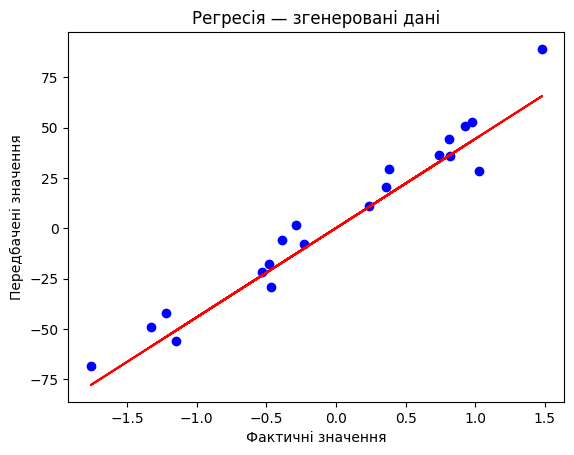

In [6]:
df_reg = pd.read_csv("regression_data.csv")

# Розділення на ознаки (X) і ціль (y)
X = df_reg[["Feature1"]]
y = df_reg["Target"]
#Створення і навчання моделі
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
# Передбачення
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

# Візуалізація (трохи спрощено, оскільки X багатовимірний)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("Фактичні значення")
plt.ylabel("Передбачені значення")
plt.title("Регресія — згенеровані дані")
plt.show()

### Варіант 3 — Згенерований власноруч (з NumPy)

    area      price
0  67.45   84518.73
1  57.93   75119.09
2  69.72   94488.91
3  82.85  109952.56
4  56.49   54008.55
MSE: 122427400.01739693, MAE: 8104.844890900323, R2: 0.6665941331504914


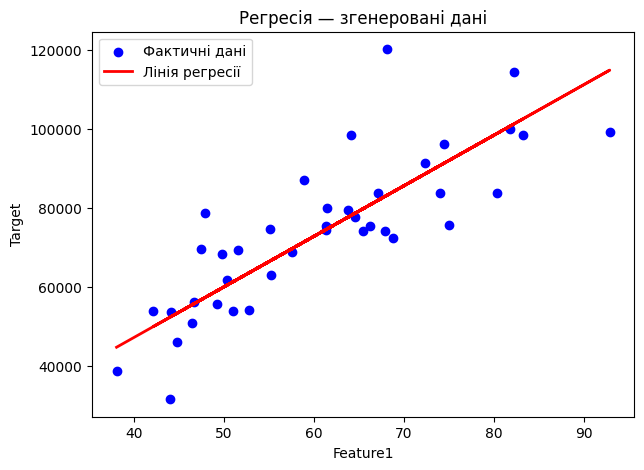

: 

In [ ]:
import pandas as pd

# Завантаження власного набору даних
df_synth = pd.read_csv("synthetic_regression_dataset.csv")

print(df_synth.head())

# Розділення на ознаки (X) і ціль (y)
X = df_synth[["area"]]
y = df_synth["price"]
# Створення і навчання моделі
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
# Передбачення
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")


# Візуалізація (оскільки X багатовимірний, робимо графік фактичні vs передбачені)
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color='blue', label='Фактичні дані')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel("Feature1")
plt.ylabel("Target")
plt.title("Регресія — згенеровані дані")
plt.legend()
plt.show()